In [1]:
'''THis block of code pre processes the data'''
from nltk.stem import WordNetLemmatizer
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()
from nltk.tokenize import word_tokenize,sent_tokenize

import csv
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'Data_mesh_publications.csv'

# Read the TSV file and convert it to a DataFrame
df = pd.read_csv(file_path, delimiter=',')
df

,Filename,Content,Publisher,Publication_type
0,Breaking Down Data Silos Data Mesh to Achieve ...,Abstract— Data localization laws...,IEEE,conference
1,Decentralized Data Governance as Part of a Dat...,Abstract —Data mesh is a socio-technical ...,IEEE,conference
2,Enterprise Data Strategy A Decentralized Data ...,Abstract— As the enterprises experience expone...,IEEE,conference
3,Finding Your Way Through the Jungle of Big Dat...,Abstract—This paper presents a systematic revi...,IEEE,conference
4,01. Evolution of Data Architecture,"When you look back in time, data architectures...",Springer,book chapter
5,02. Terminology Data Fabric and Data Mesh,The terms Data Fabric and Data Mesh are often ...,Springer,book chapter
6,03. Data Fabric and Data Mesh Use Case Scenarios,Many organizations realized the importance of ...,Springer,book chapter
7,04. Data Fabric and Data Mesh Business Benefits,"After defining a Data Fabric, also as an under...",Springer,book chapter
8,05. Key Data Fabric and Data Mesh Capabilities,This chapter introduces key capabilities for b...,Springer,book chapter
9,06. Relevant ML and DL Concepts,"to AI, ML, and DLBroadly speaking, AI is a sy...",Springer,book chapter


In [3]:
# Load stop words from NLTK library
nltk.download("stopwords")
nltk_stop_words = set(stopwords.words('english'))
print("Number of stop words from NLTK:", len(nltk_stop_words))

# Load stop words from CSV file into a DataFrame with the appropriate encoding
csv_file_path = "Data_mesh_stop_words.csv"
words_df = pd.read_csv(csv_file_path, header=None, names=["stopword"], encoding="ISO-8859-1")
custom_stop_words = set(map(str.lower, words_df["stopword"]))

# Combine stop words from both sources
stop_words = nltk_stop_words.union(custom_stop_words)

# Add words from CSV file to stop_words set
with open(csv_file_path, mode='r') as file:
    reader = csv.reader(file)
    # Skip header
    next(reader, None)
    # Add words to stop_words set
    for row in reader:
        word = row[0].lower().strip()
       
        stop_words.add(word)

Number of stop words from NLTK: 179


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mondal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
words_to_check = ['http', 'com', 'author','license' ]

# Check if each word is in stop_words, and if not, add it
for word in words_to_check:
    if word not in stop_words:
        print(f"Adding '{word}' to stop_words")
        stop_words.add(word)

# Print the updated stop_words set
print("Updated stop words set:", stop_words, len(stop_words))

Updated stop words set: {'should', 'they', 'di', 'up', 'll', 'committee', 'each', 'out', 'event', 'were', 'all', 'who', 'shan', 'numerical', 'discussion', 'their', 'more', 'also', 'process', 'couldn', 'further', 't', 'into', 'any', 'company', 'thesis', 'but', 'it', "needn't", 'has', 'lin', 'ours', 'them', 'nor', 'license ', 'context', 'detection', 'when', 'there', 'd', 'wilfr', "you're", 'library', 'tnum', 'off', 'mustn', 'online', 'see', 'centeris', 'http', 'creativecommons', 'practice', 'tjoa\xa0', 'public', ' factor', 'al', 'section', 'above', 'once', 'available', 'organization', 'of', 'here', 'how', 'own', 'review', 'challenge\xa0', 'and', 'rule', 'challenge', 'fig', 'license', 'best', 'than', "you've", 'between', 'scientific', 'he', 'until', 'was', 'a', 'what', 'technische', 'time', 'author', 'our', 'some', 'did', 'comparative', 'used', 'ed', 'ourselves', 'themselves', 'interviewee', 'computer', 'apply', 'system', 'paradigm', 'trying', "mightn't", "mustn't", 'multi', 'enterprise',

In [5]:
def clean_text(text):

    nltk.download('wordnet')
    
    # Remove HTML tags and non-English characters
    text = re.sub(r"<[^>]+>", "", str(text))
    text = re.sub(r"[^A-Za-zÀ-ž ]", " ", str(text))

    # Tokenize and convert to lowercase
    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    # Remove single characters and numbers
    words_filtered = [word for word in words_tokens_lower if len(word) > 1 and not word.isnumeric()]

    # Remove stop words
    words_filtered = [word for word in words_filtered if word not in stop_words]

    # Lemmatize words
    words_lemmatized = [lemmatizer.lemmatize(word) for word in words_filtered]

    # Join the words back into a string
    text_clean = " ".join(words_lemmatized)
    return text_clean


In [6]:
pdf_data = df.dropna(axis = 0, how = 'any', inplace = False)
    
# pdf_data = df.copy()
# drop_nan(pdf_data)
pdf_data['Content'] = pdf_data['Content'].apply(clean_text)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mondal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mondal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mondal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mondal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mondal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mondal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]    

In [7]:
pdf_data

,Filename,Content,Publisher,Publication_type
0,Breaking Down Data Silos Data Mesh to Achieve ...,abstract data localization law becoming make h...,IEEE,conference
1,Decentralized Data Governance as Part of a Dat...,abstract data socio technical decentralized an...,IEEE,conference
2,Enterprise Data Strategy A Decentralized Data ...,abstract enterprise experience exponential gro...,IEEE,conference
3,Finding Your Way Through the Jungle of Big Dat...,abstract paper present systematic ofcommon ana...,IEEE,conference
4,01. Evolution of Data Architecture,look back data architecture developed response...,Springer,book chapter
5,02. Terminology Data Fabric and Data Mesh,term data fabric data often viewed different c...,Springer,book chapter
6,03. Data Fabric and Data Mesh Use Case Scenarios,organization realized importance implementing ...,Springer,book chapter
7,04. Data Fabric and Data Mesh Business Benefits,defining data fabric underlying data architect...,Springer,book chapter
8,05. Key Data Fabric and Data Mesh Capabilities,introduces key capability concept knowledge ca...,Springer,book chapter
9,06. Relevant ML and DL Concepts,ai ml dlbroadly speaking ai simulate human per...,Springer,book chapter


In [8]:
# Assuming 'pdf_content' column contains the cleaned text
text_combined = ' '.join(pdf_data['Content'])

# Tokenize the text
tokens = word_tokenize(text_combined)

# Count the frequency of each word
word_freq = nltk.FreqDist(tokens)

# Create a DataFrame from the frequency distribution
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

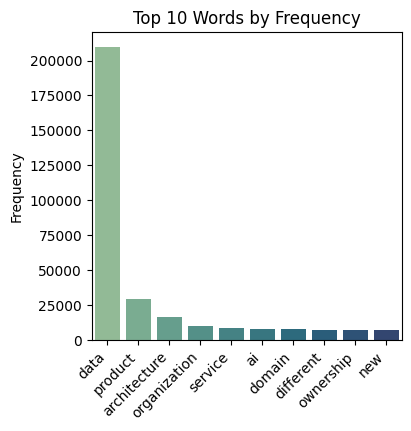

In [28]:
# Plot the top N words by frequency in a bar chart
plt.figure(figsize=(4, 4))

# Choose a Seaborn color palette (e.g., 'flare')
original_palette = sns.color_palette('crest', n_colors=10)

# Invert the color palette
# inverted_palette = sns.color_palette('crest', n_colors=50)[::-1]

sns.barplot(x='Word', y='Frequency', data=word_freq_df.head(10), palette=original_palette, hue = 'Word')
plt.title('Top 10 Words by Frequency')
plt.ylabel('Frequency')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.show()

In [10]:
pdf_data

,Filename,Content,Publisher,Publication_type
0,Breaking Down Data Silos Data Mesh to Achieve ...,abstract data localization law becoming make h...,IEEE,conference
1,Decentralized Data Governance as Part of a Dat...,abstract data socio technical decentralized an...,IEEE,conference
2,Enterprise Data Strategy A Decentralized Data ...,abstract enterprise experience exponential gro...,IEEE,conference
3,Finding Your Way Through the Jungle of Big Dat...,abstract paper present systematic ofcommon ana...,IEEE,conference
4,01. Evolution of Data Architecture,look back data architecture developed response...,Springer,book chapter
5,02. Terminology Data Fabric and Data Mesh,term data fabric data often viewed different c...,Springer,book chapter
6,03. Data Fabric and Data Mesh Use Case Scenarios,organization realized importance implementing ...,Springer,book chapter
7,04. Data Fabric and Data Mesh Business Benefits,defining data fabric underlying data architect...,Springer,book chapter
8,05. Key Data Fabric and Data Mesh Capabilities,introduces key capability concept knowledge ca...,Springer,book chapter
9,06. Relevant ML and DL Concepts,ai ml dlbroadly speaking ai simulate human per...,Springer,book chapter


In [11]:
csv_filename = 'Data_mesh_publications_cleaned.csv'

# Save the DataFrame to a CSV file
pdf_data.to_csv(csv_filename, index=False)

In [12]:
word_freq_df.head(20)

,Word,Frequency
1,data,209886
143,product,29558
22,architecture,16683
35,organization,9824
288,service,8907
1438,ai,7825
142,domain,7647
11,different,7443
305,ownership,7370
20,new,7045
